(2107, 2107)


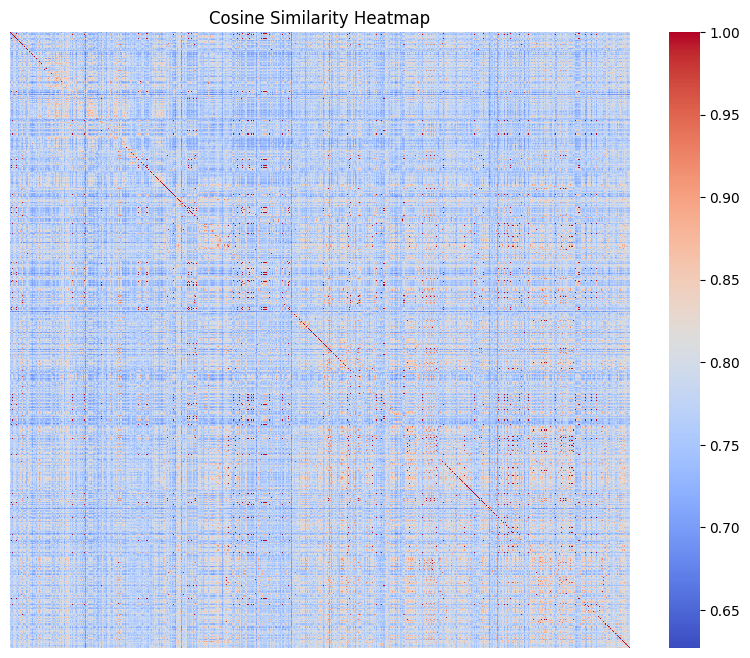

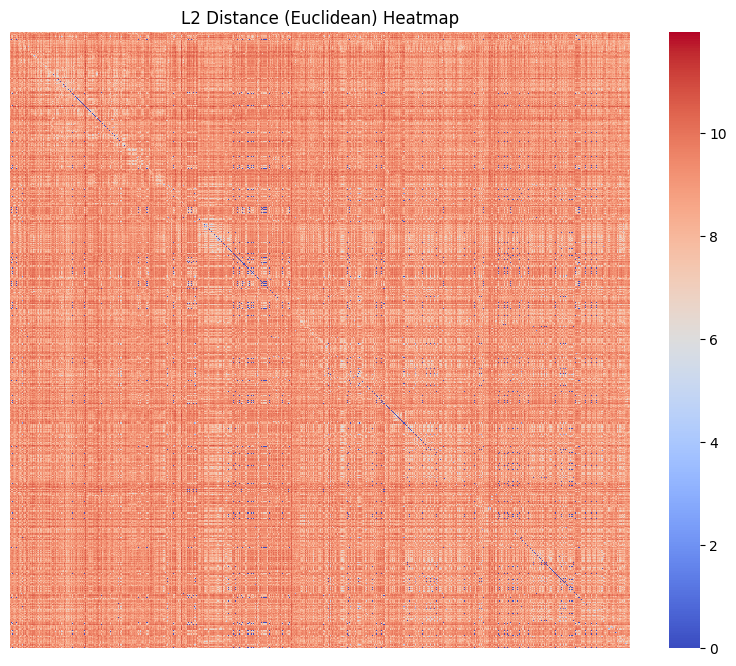

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Assuming `embeddings` is a NumPy array with each row as the embedding of a paragraph.
embeddings=np.load('paragraph_embeddings.npy')
embeddings=np.load('embeddings.npy')
# Calculate cosine similarity (values between -1 and 1)
cos_sim = cosine_similarity(embeddings)
print(cos_sim.shape)

# Calculate L2 distance (Euclidean distance)
l2_dist = euclidean_distances(embeddings)

# Plotting the cosine similarity heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity Heatmap")
plt.show()

# Plotting the L2 distance heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(l2_dist, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("L2 Distance (Euclidean) Heatmap")
plt.show()

In [5]:
import torch.nn.functional as F

from torch import Tensor
from transformers import AutoTokenizer, AutoModel
import torch

def average_pool(last_hidden_states: Tensor,
                 attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

import requests
import re

# URL of the German Criminal Code in English
url = "https://www.gesetze-im-internet.de/englisch_stgb/englisch_stgb.html"

# Fetch the webpage content
response = requests.get(url)
html_content = response.text

print(html_content)

# Remove HTML tags to get plain text
clean_text = re.sub('<[^<]+?>', '', html_content)

# Define regex pattern to match paragraphs starting with (1), (2), etc., and their corresponding text
paragraph_pattern = r'\(\d+\)\s(.*?)(?=\(\d+\)|$)'

# Find all paragraphs using the regex pattern
paragraphs = re.findall(paragraph_pattern, clean_text, re.DOTALL)

# Clean up paragraphs by stripping whitespace
paragraphs = [para.strip() for para in paragraphs]
print(paragraphs)

# Now, 'paragraphs' contains all the paragraphs starting with (1), (2), etc., and their corresponding text.
# You can print or process them as needed
for idx, paragraph in enumerate(paragraphs):
    print(f"{idx + 1}: {paragraph}\n")

tokenizer = AutoTokenizer.from_pretrained('intfloat/e5-base-v2')
model = AutoModel.from_pretrained('intfloat/e5-base-v2')

# Function to tokenize and embed a single paragraph
def tokenize_and_embed(paragraph):
    # Tokenize the paragraph
    tokenized_paragraph = tokenizer(paragraph, padding=True, truncation=True, return_tensors="pt")
    # Generate embeddings
    with torch.no_grad():  # Disable gradient calculations for efficiency
        embedding = model(**tokenized_paragraph)
    # Return the embeddings from the model output (typically use the last hidden state or pooler output)
    return average_pool(embedding.last_hidden_state, tokenized_paragraph["attention_mask"])
  # Average embeddings for each token

# Use map to tokenize and embed each paragraph in the list
embeddings = np.array(list(map(tokenize_and_embed, paragraphs)))

/home/maria/Documents/LegalRAG/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<?xml version="1.0" encoding="iso-8859-1"?><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en"><head><meta content="text/html; charset=iso-8859-1" http-equiv="Content-Type" /><title>German Criminal Code (Strafgesetzbuch &#8211; StGB)</title><link href="../css/style.css" media="screen" rel="stylesheet" type="text/css" /><link href="../css/print_aiz_einzel.css" media="print" rel="stylesheet" type="text/css" /><link href="../css/jnhtml.css" rel="stylesheet" type="text/css" /></head><body><a name="Seitenanfang"><!----></a><div id="fTop"><div id="fTop1"><!----></div><div id="fTop2"><!----></div></div><div id="fTopLogos"><a href="http://www.bmjv.bund.de" target="_blank"><img align="left" border="0" height="104" src="../img/lay/BfJ_2021_WebSVG_en_en.svg" usemap="#imgmap2018913165839" width="230" /><map id="imgmap2018913165839" name="imgmap2018913165839"><area alt="Log

In [8]:
print(embeddings.shape)

(2107, 1, 768)


(2107, 2107)


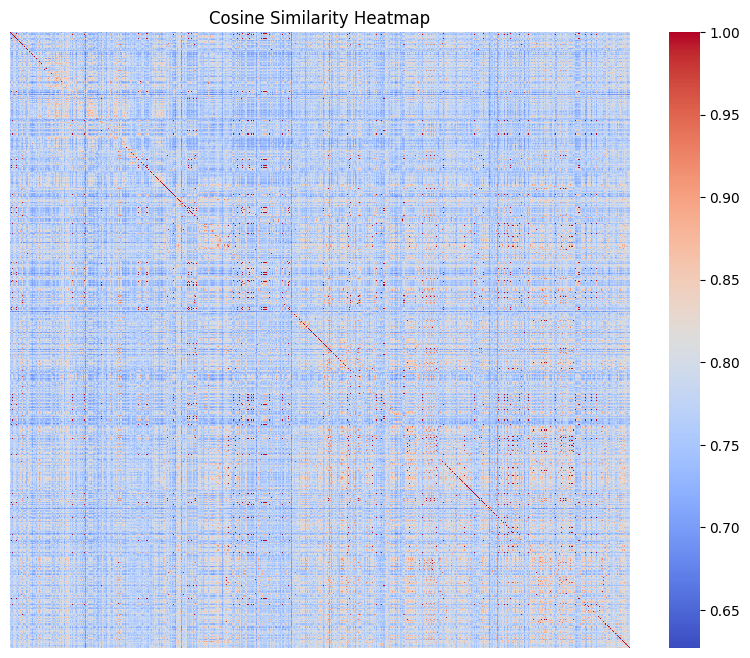

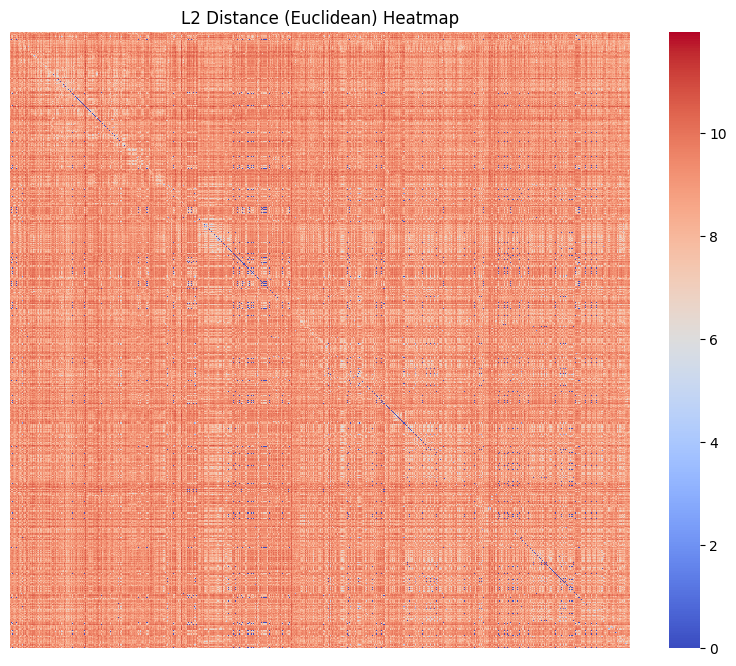

In [9]:
cos_sim = cosine_similarity(embeddings.squeeze(1))
print(cos_sim.shape)

# Calculate L2 distance (Euclidean distance)
l2_dist = euclidean_distances(embeddings.squeeze(1))

# Plotting the cosine similarity heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity Heatmap")
plt.show()

# Plotting the L2 distance heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(l2_dist, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("L2 Distance (Euclidean) Heatmap")
plt.show()